In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare the Data

In [2]:
# Read the data
ratings_df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m18/lesson_3/datasets/ratings.txt",
                         sep=" ",
                         header=None,
                         names=["user_id", "movie_id", "rating"])
ratings_df

,user_id,movie_id,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
...,...,...,...
35492,1508,84,3.5
35493,1508,17,4.0
35494,1508,669,1.0
35495,1508,686,2.5


In [3]:
# Remove duplicates on user_id and movie_id, keeping the last row
ratings_df = ratings_df.drop_duplicates(subset=["user_id", "movie_id"], keep="last")
ratings_df

,user_id,movie_id,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
...,...,...,...
35492,1508,84,3.5
35493,1508,17,4.0
35494,1508,669,1.0
35495,1508,686,2.5


In [4]:
# Pivot the DataFrame and fill NAs
ratings_matrix = ratings_df.pivot(index="user_id", columns="movie_id", values="rating").fillna(0)
ratings_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,4.0,3.5,3.0,4.0,3.5,3.5,3.0,2.5,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,3.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1505,4.0,3.0,2.0,3.0,4.0,0.0,4.0,3.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1506,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Create variable for normalization
# Ratings are between 0-5
normalization_factor = 5

# Normalize the ratings
normalized_ratings = ratings_matrix / normalization_factor
normalized_ratings

movie_id,1,2,3,4,5,6,7,8,9,10,...,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.4,0.8,0.7,0.6,0.8,0.7,0.7,0.6,0.5,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.6,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,0.6,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6
1505,0.8,0.6,0.4,0.6,0.8,0.0,0.8,0.6,0.8,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1506,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_train = normalized_ratings.values
X_train

array([[0.4, 0.8, 0.7, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.8, 0. , ..., 0. , 0. , 0. ],
       [0.3, 0.6, 0.4, ..., 0. , 0. , 0. ]])

## Train the Model

In [7]:
# Set the number of neurons for the layers
hiddenUnits = 20
visibleUnits =  len(ratings_matrix.columns)

# Set the bias of the visible layer to 0. This should use the number of unique movies.
visible_layer_bias = tf.Variable(tf.zeros([visibleUnits]), tf.float32)

# Set the bias of the hidden layer to 0. This will use hiddenUnits, which is
# the number of features we're going to learn
hidden_layer_bias = tf.Variable(tf.zeros([hiddenUnits]), tf.float32)

# Set the Weights to 0
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)

In [8]:
v0 = tf.zeros([visibleUnits], tf.float32)
# testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [9]:
# Phase 1: Input Processing
# Define a function to return only the generated hidden states
def hidden_layer(v0_state, W, hb):
    # probabilities of the hidden units
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)
    # sample_h_given_X
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob))))
    return h0_state

# Print output of zeros input
h0 = hidden_layer(v0, W, hidden_layer_bias)
print("first 15 hidden states: ", h0[0][0:15])

# Define a function to return the reconstructed output
def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb)
    # sample_v_given_h
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob))))
    return v1_state[0]

# Get reconstructed output from zeros input
v1 = reconstructed_output(h0, W, visible_layer_bias)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.], shape=(15,), dtype=float32)
hidden state shape:  (1, 20)
v0 state shape:   (2071,)
v1 state shape:   (2071,)


In [10]:
# Set the error function, which in this case will be the Mean Absolute Error Function.
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.4973443


Epoch: 1 batch #: 0  of 7 sample #: 199 reconstruction error: 0.016881
Epoch: 1 batch #: 1  of 7 sample #: 199 reconstruction error: 0.005891
Epoch: 1 batch #: 2  of 7 sample #: 199 reconstruction error: 0.005234
Epoch: 1 batch #: 3  of 7 sample #: 199 reconstruction error: 0.008252
Epoch: 1 batch #: 4  of 7 sample #: 199 reconstruction error: 0.006572
Epoch: 1 batch #: 5  of 7 sample #: 199 reconstruction error: 0.010521
Epoch: 1 batch #: 6  of 7 sample #: 199 reconstruction error: 0.001685
Epoch: 1 batch #: 7  of 7 sample #: 107 reconstruction error: 0.007798


2024-06-18 18:58:01.588778: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 2 batch #: 0  of 7 sample #: 199 reconstruction error: 0.014853
Epoch: 2 batch #: 1  of 7 sample #: 199 reconstruction error: 0.000966
Epoch: 2 batch #: 2  of 7 sample #: 199 reconstruction error: 0.003303
Epoch: 2 batch #: 3  of 7 sample #: 199 reconstruction error: 0.009314
Epoch: 2 batch #: 4  of 7 sample #: 199 reconstruction error: 0.008407
Epoch: 2 batch #: 5  of 7 sample #: 199 reconstruction error: 0.009845
Epoch: 2 batch #: 6  of 7 sample #: 199 reconstruction error: 0.002651
Epoch: 2 batch #: 7  of 7 sample #: 107 reconstruction error: 0.007026


2024-06-18 18:58:03.529832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 3 batch #: 0  of 7 sample #: 199 reconstruction error: 0.013887
Epoch: 3 batch #: 1  of 7 sample #: 199 reconstruction error: 0.002704
Epoch: 3 batch #: 2  of 7 sample #: 199 reconstruction error: 0.005138
Epoch: 3 batch #: 3  of 7 sample #: 199 reconstruction error: 0.008735
Epoch: 3 batch #: 4  of 7 sample #: 199 reconstruction error: 0.008986
Epoch: 3 batch #: 5  of 7 sample #: 199 reconstruction error: 0.009845
Epoch: 3 batch #: 6  of 7 sample #: 199 reconstruction error: 0.001685
Epoch: 3 batch #: 7  of 7 sample #: 107 reconstruction error: 0.008474


2024-06-18 18:58:05.431941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 4 batch #: 0  of 7 sample #: 199 reconstruction error: 0.015818
Epoch: 4 batch #: 1  of 7 sample #: 199 reconstruction error: 0.001931
Epoch: 4 batch #: 2  of 7 sample #: 199 reconstruction error: 0.003882
Epoch: 4 batch #: 3  of 7 sample #: 199 reconstruction error: 0.007190
Epoch: 4 batch #: 4  of 7 sample #: 199 reconstruction error: 0.008889
Epoch: 4 batch #: 5  of 7 sample #: 199 reconstruction error: 0.009845
Epoch: 4 batch #: 6  of 7 sample #: 199 reconstruction error: 0.000719
Epoch: 4 batch #: 7  of 7 sample #: 107 reconstruction error: 0.008474


2024-06-18 18:58:07.342834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 5 batch #: 0  of 7 sample #: 199 reconstruction error: 0.016591
Epoch: 5 batch #: 1  of 7 sample #: 199 reconstruction error: 0.002897
Epoch: 5 batch #: 2  of 7 sample #: 199 reconstruction error: 0.003882
Epoch: 5 batch #: 3  of 7 sample #: 199 reconstruction error: 0.008928
Epoch: 5 batch #: 4  of 7 sample #: 199 reconstruction error: 0.011400
Epoch: 5 batch #: 5  of 7 sample #: 199 reconstruction error: 0.010521
Epoch: 5 batch #: 6  of 7 sample #: 199 reconstruction error: 0.001202
Epoch: 5 batch #: 7  of 7 sample #: 107 reconstruction error: 0.008764


2024-06-18 18:58:09.261711: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


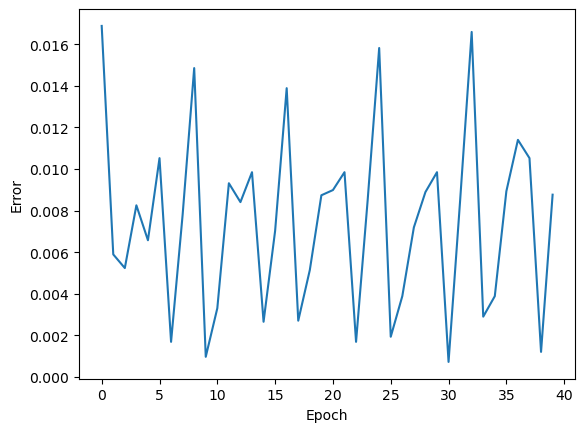

In [11]:
# Set the training variables
epochs = 5
batchsize = 200
errors = []
weights = []
K=1
alpha = 0.1

# Create dataset batches
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(X_train))).batch(batchsize)



v0_state=v0

# Train the model
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:

        for i_sample in range(len(batch_x)):
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hidden_layer_bias)
                v1_state = reconstructed_output(h0_state, W, visible_layer_bias)
                h1_state = hidden_layer(v1_state, W, hidden_layer_bias)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)

                # Update weights
                W = W + alpha * delta_W

                # Update biases
                visible_layer_bias = visible_layer_bias + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hidden_layer_bias = hidden_layer_bias + alpha * tf.reduce_mean(h0_state - h1_state, 0)

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1),
                       "batch #: %i " % batch_number, "of %i" % (len(X_train)/batchsize),
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1

# Plot the errors
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

## Save Model

In [12]:
# Collect the weights and biases so we can rebuild the model without re-training
print("Weights: ", W)
print("Hidden Layer Biases: ", hidden_layer_bias)
print("Visible Layer Biases: ", visible_layer_bias)

Weights:  tf.Tensor(
[[-0.05999811  0.41000304 -1.4300064  ...  0.93998575 -0.57000303
  -1.8000014 ]
 [-0.08999498 -0.0499982  -0.38999656 ...  1.2399944  -1.260001
  -1.4800019 ]
 [-0.5699979   0.12000267 -1.7200018  ...  0.230006   -1.5200016
  -1.5099996 ]
 ...
 [-0.65000004 -0.65       -0.15000004 ... -0.35       -0.15000004
  -0.4       ]
 [-0.50000006 -0.52000004 -0.29999998 ... -0.29999998  0.
  -0.18      ]
 [-0.36       -0.42       -0.6        ... -0.5        -0.4
  -0.4       ]], shape=(2071, 20), dtype=float32)
Hidden Layer Biases:  tf.Tensor(
[ 8.99999809e+00  1.40000033e+00  9.70000076e+00  1.00000024e+00
 -2.59999943e+00  1.33000145e+01  1.33000145e+01  6.29999638e+00
  2.69999981e+00  1.10000026e+00  1.00000136e-01  6.49999619e+00
  1.34110451e-07 -1.70000005e+00  1.59000244e+01  6.49999619e+00
  1.10000057e+01  1.00000019e+01  4.99999762e+00  1.70000041e+00], shape=(20,), dtype=float32)
Visible Layer Biases:  tf.Tensor([-2.3426974 -2.3426974 -2.3426974 ... -2.3426974 -

In [13]:
# Convert the weights into a Pandas DataFrame
weight_settings = pd.DataFrame(data=W.numpy())

# Save weights to CSV
weight_settings.to_csv("rbm_weights.csv", index=False)

In [14]:
# Convert the biases to Pandas DataFrame and export to CSVs
hidden_bias_settings = pd.DataFrame(data=hidden_layer_bias.numpy())
hidden_bias_settings.to_csv("hidden_layer_bias.csv", index=False)
visible_bias_settings = pd.DataFrame(visible_layer_bias.numpy())
visible_bias_settings.to_csv("visible_layer_bias.csv", index=False)

## Retrieve Model

In [15]:
# Read weights and convert back to Tensor
weight_settings = pd.read_csv("rbm_weights.csv")
weights_tensor = tf.constant(weight_settings.values, tf.float32)
weights_tensor

<tf.Tensor: shape=(2071, 20), dtype=float32, numpy=
array([[-0.05999811,  0.41000304, -1.4300064 , ...,  0.93998575,
        -0.57000303, -1.8000014 ],
       [-0.08999498, -0.0499982 , -0.38999656, ...,  1.2399944 ,
        -1.260001  , -1.4800019 ],
       [-0.5699979 ,  0.12000267, -1.7200018 , ...,  0.230006  ,
        -1.5200016 , -1.5099996 ],
       ...,
       [-0.65000004, -0.65      , -0.15000004, ..., -0.35      ,
        -0.15000004, -0.4       ],
       [-0.50000006, -0.52000004, -0.29999998, ..., -0.29999998,
         0.        , -0.18      ],
       [-0.36      , -0.42      , -0.6       , ..., -0.5       ,
        -0.4       , -0.4       ]], dtype=float32)>

In [16]:
# Read hidden layer biases and convert back to Tensor
hidden_bias_settings = pd.read_csv("hidden_layer_bias.csv")
hidden_tensor = tf.constant(hidden_bias_settings.values.flatten(), tf.float32)
hidden_tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 8.99999809e+00,  1.40000033e+00,  9.70000076e+00,  1.00000024e+00,
       -2.59999943e+00,  1.33000145e+01,  1.33000145e+01,  6.29999638e+00,
        2.69999981e+00,  1.10000026e+00,  1.00000136e-01,  6.49999619e+00,
        1.34110451e-07, -1.70000005e+00,  1.59000244e+01,  6.49999619e+00,
        1.10000057e+01,  1.00000019e+01,  4.99999762e+00,  1.70000041e+00],
      dtype=float32)>

In [17]:
# Read visible layer biases and convert back to Tensor
visible_bias_settings = pd.read_csv("visible_layer_bias.csv")
visible_tensor = tf.constant(visible_bias_settings.values.flatten(), tf.float32)
visible_tensor

<tf.Tensor: shape=(2071,), dtype=float32, numpy=
array([-2.3426974, -2.3426974, -2.3426974, ..., -2.3426974, -2.3426974,
       -2.3426974], dtype=float32)>

## Test Model Recommendations

In [18]:
# Create a function to reconstruct ratings data
def get_user_recommendations(user_id):
    inputUser = tf.convert_to_tensor(normalized_ratings.loc[user_id].values,"float32")
    v0 = inputUser

    hh0 = tf.nn.sigmoid(tf.matmul([v0], weights_tensor) + hidden_tensor)

    vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(weights_tensor)) + visible_tensor)

    rec = vv1
    return rec

In [19]:
# Test recommendation
test_user = 1024

recommendation = get_user_recommendations(test_user)
recommendation

<tf.Tensor: shape=(1, 2071), dtype=float32, numpy=
array([[7.8073484e-01, 8.5967100e-01, 3.8131684e-01, ..., 2.0660087e-04,
        1.2150483e-03, 1.9105051e-03]], dtype=float32)>

In [20]:
# Convert recommendation to DataFrame

rec_df = pd.DataFrame({"movie_id": ratings_matrix.columns, "user_id": test_user})
rec_df = rec_df.assign(RecommendationScore = recommendation[0])

# Sort recommendations
rec_df.sort_values(["RecommendationScore"], ascending=False).head(20)

,movie_id,user_id,RecommendationScore
4,5,1024,0.955992
12,13,1024,0.893826
1,2,1024,0.859671
216,217,1024,0.790855
0,1,1024,0.780735
215,216,1024,0.767837
9,10,1024,0.749318
256,257,1024,0.748980
253,254,1024,0.735972
248,249,1024,0.712043


In [21]:
# Merge recommendation scores with original dataset ratings
merged_df = rec_df.merge(ratings_df, on=['movie_id', 'user_id'], how='outer')
merged_df.sort_values(["RecommendationScore"], ascending=False).head(20)

,movie_id,user_id,RecommendationScore,rating
3647,5,1024,0.955992,NaN
9656,13,1024,0.893826,3.5
1499,2,1024,0.859671,3.0
18525,217,1024,0.790855,NaN
597,1,1024,0.780735,3.5
18013,216,1024,0.767837,2.5
7183,10,1024,0.749318,2.5
29474,257,1024,0.748980,1.0
28145,254,1024,0.735972,4.0
25924,249,1024,0.712043,4.0
